In [1]:
import pandas as pd
import pickle
import numpy as np 
import matplotlib.pyplot as plt 
import os,sys
os.chdir('../')
sys.path.append('./src/data')
sys.path.append('./src/probability')
sys.path.append('./src/events')
from main import ic_params
from processer import get_probabilities, generate_probabilities

C:\Users\Martin\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [5]:
ic_params['dm_41']=5

In [7]:
generate_probabilities('m', 'm', [1e2,1e3],[-0.5,-0.7], E_bin= 5,z_bin= 5, params=ic_params, anti=True, N=13)

In [8]:
get_probabilities('m', 'm', 5, 5, ic_params, True, 13, 4)

array([[0.94502331, 0.89476752],
       [0.8456448 , 0.90122444]])

In [19]:
df = pd.read_csv('data/files/ic_2016_ut_um.csv', names=['Um','Ut']).sort_values('Um')
df['th24'] = np.arcsin(np.sqrt(df.Um)) # Um4^2 = sin(th24)^2
df['th34'] =  np.arcsin(np.sqrt(df.Ut/np.cos(df['th24'])**2))  # Ut4^2 = sin(th34)^2 cos(th24)^2

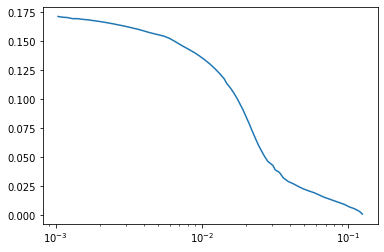

In [20]:
plt.plot(df.Um, df.Ut)
plt.xscale('log')

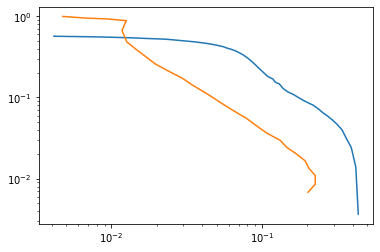

In [17]:
ic_34_cl90 = pd.read_csv('/data/files/ic_34_cl90.csv',header=None, names=['s24','s34']).sort_values('s34')
plt.plot(np.sin(2*df.th24)**2, np.sin(2*df.th34)**2)
plt.plot(ic_34_cl90.s24, ic_34_cl90.s34)
plt.xscale('log')
plt.yscale('log')

In [160]:
df_chunks = pd.read_csv('../src/data/files/DC/CC_NuE.txt', skiprows=1, delimiter='\t', names=['z', 'E', 'aeff'],skip_blank_lines=False)

In [377]:
df_list = np.split(df_chunks, df_chunks[df_chunks.isnull().all(1)].index)
_=df_list.pop(-1)

,z,E,aeff
12034,NaN,NaN,NaN


In [416]:
new_list=[]
for df in df_list:  
    df = (df.dropna()
       .reset_index(drop=True)
       .drop(0)
       .convert_dtypes())
    df.z = df.z.str.replace('[','')
    df.E = df.E.str.replace('[','')
    df.z = df.z.str.replace(']','')
    df.E = df.E.str.replace(']','')

    z_ranges = pd.DataFrame(df.z.str.split(',', expand=True))
    E_ranges = pd.DataFrame(df.E.str.split(',', expand=True))
    df['zmin'] = z_ranges[0].astype(np.float64)
    df['zmax'] = z_ranges[1].astype(np.float64)
    df['Emin'] = E_ranges[0].astype(np.float64)
    df['Emax'] = E_ranges[1].astype(np.float64)

    df['E_avg'] = (df['Emax'] + df['Emin'])/2
    df['z_avg'] = (df['zmax'] + df['zmin'])/2
    df['aeff']= df['aeff'].astype(np.float64)
    df.z_avg[df.z_avg == -0.9975] = -1
    new_list.append(df)

<ipython-input-416-cc2ff6c47dbf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.z_avg[df.z_avg == -0.9975] = -1
<ipython-input-416-cc2ff6c47dbf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.z_avg[df.z_avg == -0.9975] = -1
<ipython-input-416-cc2ff6c47dbf>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.z_avg[df.z_avg == -0.9975] = -1
<ipython-input-416-cc2ff6c47dbf>:22: SettingWithCopyWarning: 
A value is trying to be

In [79]:
z_df = (df['z'].apply(lambda x : pd.Series(x.split(',')))
                .convert_dtypes(convert_string=True))
z_df[0]= z_df[0].str.replace('[','')
z_df[1]= z_df[1].str.replace(']','')

In [83]:
z_df

,0,1
0,-0.990,-0.985
1,-0.980,-0.976
2,-0.966,-0.961
3,-0.961,-0.956
4,-0.961,-0.956
...,...,...
11964,0.717,0.722
11965,0.756,0.761
11966,0.771,0.776
11967,0.805,0.810
